## **1. Business Understanding**

Energy efficiency in buildings is a critical factor in reducing operational costs, enhancing sustainability and supporting global climate change mitigation efforts. Heating and cooling loads are two of the most important indicators of a building’s energy performance. Accurately predicting these loads enables architects, engineers and energy planners to design buildings that use less energy, meet environmental standards and reduce long-term operational expenses.

The **Energy Efficiency Dataset** contains eight building attributes, including:

- Relative compactness  
- Surface area  
- Wall area  
- Roof area  
- Overall height  
- Orientation  
- Glazing area  
- Glazing area distribution  

These features influence how much energy a building requires for heating and cooling. The dataset includes two target variables:

- **Heating Load (HL)**  
- **Cooling Load (CL)**  

By applying machine learning specifically regression models accurate prediction of HL and CL becomes possible, supporting energy efficient architectural design and building optimization.

---

## **2. Problem Statement**

The task is to design, train, and evaluate separate **linear regression models** to predict heating load and cooling load using eight building features. The analysis must:

1. Train two regression models using the training dataset (`energy_efficiency_dataset_train.csv`).
2. Evaluate both models using standard regression metrics (MSE, MAE, RMSE, MAPE, R²).
3. Visualize predictions against an input feature with regression lines.
4. Compare linear regression with other regression techniques:
   - Polynomial Regression  
   - Ridge Regression  
   - Lasso Regression  
   - Support Vector Regression (SVR)
5. Analyze feature importance using Pearson correlation.
6. Save the trained models as `model1_2.pkl` and `model2_2.pkl`.

---

## **3. Objectives**

### **Primary Objective**
To develop two **Linear Regression models** for predicting:
- Heating Load → saved as **model1_2.pkl**
- Cooling Load → saved as **model2_2.pkl**
### **Secondary Objectives**
- Model Testing & Evaluation  
- Visualization   
- Feature Impact Analysis    
- Model Comparison  
- Result Discussion  
- Hyperparameter & Conclusion Discussion  
- Expected Deliverables  

### **Importing the Necessary Libaraies**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [2]:
DATA_DIR = r"c:\Users\UNETS COMPUTERS\Machine learning class-BSCS-3\ML_EXAM\Question2"
os.makedirs(DATA_DIR, exist_ok=True)

# Replace these with the actual filenames in your folder:
TRAIN_CSV = os.path.join(DATA_DIR, "energy efficiency dataset_train.csv")
TEST_CSV  = os.path.join(DATA_DIR, "energy efficiency dataset_test.csv")

MODEL1_PATH = os.path.join(DATA_DIR, "model1_2.pkl")   # heating model
MODEL2_PATH = os.path.join(DATA_DIR, "model2_2.pkl")   # cooling model
RESULTS_CSV = os.path.join(DATA_DIR, "question2_results.csv")

In [3]:

# quick checks to help debug missing files
if not os.path.exists(TRAIN_CSV) or not os.path.exists(TEST_CSV):
    print("Files in", DATA_DIR, ":")
    for f in os.listdir(DATA_DIR):
        print(" -", f)
    missing = [p for p in (TRAIN_CSV, TEST_CSV) if not os.path.exists(p)]
    raise FileNotFoundError(f"Missing files: {missing}. Place the CSVs in the folder or update TRAIN_CSV/TEST_CSV paths.")

In [4]:
# helper: load dataset (last two cols = targets)
def load_xy(path):
    df = pd.read_csv(path)
    X = df.iloc[:, :-2].values
    y = df.iloc[:, -2:].values   # col -2 = heating, -1 = cooling
    return X, y, df

In [5]:
X_train, y_train, df_train = load_xy(TRAIN_CSV)
X_test,  y_test,  df_test  = load_xy(TEST_CSV)

In [6]:
# print first and last 5 rows of the training data
print("First 5 rows of the training data:") 
print(df_train.head())
print(df_train.tail())


First 5 rows of the training data:
   relative_compactness  surface_area  wall_area  roof_area  overall_height  \
0                  0.82         612.5      318.5      147.0             7.0   
1                  0.64         784.0      343.0      220.5             3.5   
2                  0.86         588.0      294.0      147.0             7.0   
3                  0.90         563.5      318.5      122.5             7.0   
4                  0.66         759.5      318.5      220.5             3.5   

   orientation  glazing_area  glazing_area_distribution  heating_load  \
0            2          0.10                          1         23.53   
1            4          0.40                          2         18.90   
2            4          0.25                          2         29.27   
3            4          0.25                          1         32.84   
4            5          0.10                          4         11.43   

    cooling_load  
0          27.31  
1          22

In [7]:
#print the first 5 rows of the testing data
print("First 5 rows of the testing data:")
print(df_test.head())   
print(df_test.tail())

First 5 rows of the testing data:
   relative_compactness  surface_area  wall_area  roof_area  overall_height  \
0                  0.62         808.5      367.5     220.50             3.5   
1                  0.66         759.5      318.5     220.50             3.5   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.79         637.0      343.0     147.00             7.0   
4                  0.64         784.0      343.0     220.50             3.5   

   orientation  glazing_area  glazing_area_distribution  heating_load  \
0            2          0.40                          3         16.47   
1            2          0.25                          1         13.17   
2            2          0.40                          3         32.82   
3            4          0.40                          4         41.32   
4            3          0.25                          4         16.69   

    cooling_load  
0          16.90  
1          16.

### Checking for Missing Values

In [8]:
#check for missing values for both training and testing data
print("Missing values in training data:\n", df_train.isnull().sum())
print("Missing values in testing data:\n", df_test.isnull().sum())


Missing values in training data:
 relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
 cooling_load                0
dtype: int64
Missing values in testing data:
 relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
 cooling_load                0
dtype: int64


### Check for Outliers

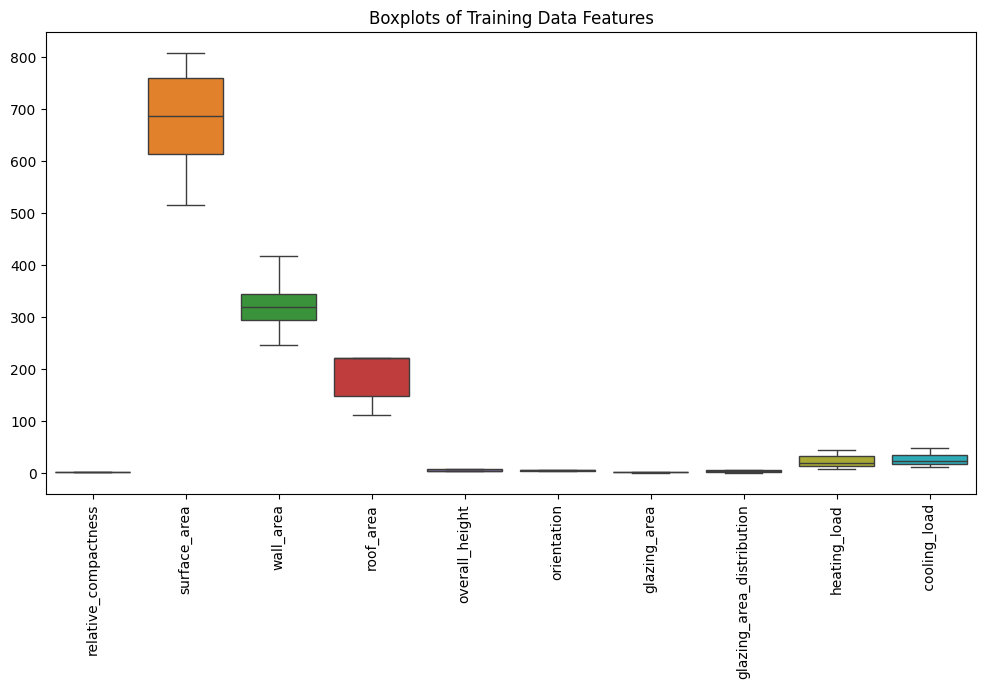

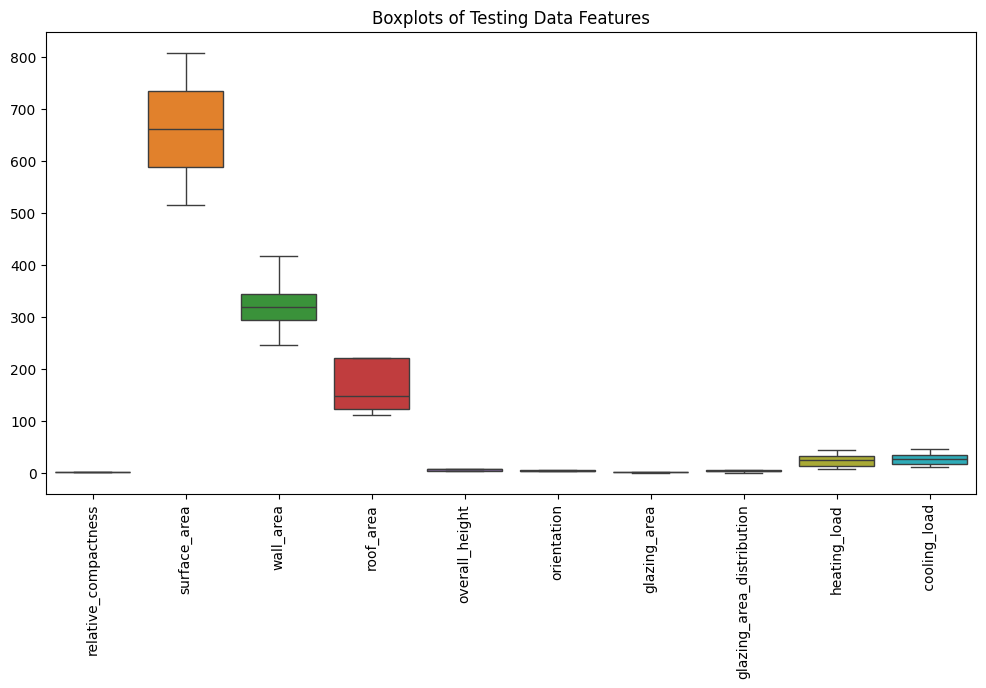

In [9]:
#check for outliers for both training and testing data
def plot_boxplots(df, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df.select_dtypes(include=[np.number]))
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()
plot_boxplots(df_train, "Boxplots of Training Data Features")
plot_boxplots(df_test, "Boxplots of Testing Data Features")

There are no outliers

In [10]:
X_train, y_train, df_train = load_xy(TRAIN_CSV)
X_test,  y_test,  df_test  = load_xy(TEST_CSV)

In [11]:
# scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

###  (a) Training two separate linear regressors

In [ ]:
# Train two separate linear regressors 
lr_heat  = LinearRegression()
lr_cool  = LinearRegression()
lr_heat.fit(X_train_s, y_train[:,0])
lr_cool.fit(X_train_s, y_train[:,1])



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
print("Linear Regression Heating Coefficients:", lr_heat.coef_)
print("Linear Regression Cooling Coefficients:", lr_cool.coef_)

Linear Regression Heating Coefficients: [-6.51760118 -3.60458642  0.79533932 -3.91736677  7.21546395 -0.03593382
  2.70005138  0.32734522]
Linear Regression Cooling Coefficients: [-7.48788568 -4.13851151  0.13786172 -4.12398338  7.07984155  0.06115785
  1.98217063  0.0523191 ]


### Explanation
The regression coefficients reveal distinct yet structurally similar patterns for heating and cooling loads. Both models show strong negative impacts from features at indices 0, 1, 3 and 5 (heating) or positive at index 5 (cooling) suggesting certain building characteristics consistently reduce energy requirements. Conversely, features at indices 2, 4, 6 and 7 contribute positively to both loads, indicating energy demanding attributes. Notably, the cooling coefficients (-7.49, -4.14, -4.12) are more negative than their heating counterparts (-6.52, -3.60, -3.92), suggesting certain features provide greater cooling efficiency gains than heating savings. The similar magnitude and direction patterns between the two coefficient sets (particularly at indices 4: 7.22 vs 7.08) indicate shared underlying physics governing both thermal loads.

The similar coefficient patterns show that the same building features affect both heating and cooling energy use, just with different levels of impact. Feature 4 which has almost identical positive coefficients in both models, is likely tied to a basic thermal property such as surface area or building volume that increases energy demand in both seasons. The opposite signs for feature 5 suggest something more nuanced: this feature lowers heating requirements but slightly raises cooling needs possibly due to insulation or building orientation that behaves differently in warm and cold conditions. Overall, the models highlight that improving energy efficiency requires a balanced approach, because changes that help reduce heating loads won’t always benefit cooling. The strongest coefficients (features 0, 1, 3 and 4) point to the most important areas to focus on when designing or retrofitting buildings for better energy performance.

In [14]:
# save models (with scaler) as required (model1_2.pkl, model2_2.pkl)
joblib.dump({"model": lr_heat, "scaler": scaler}, MODEL1_PATH)
joblib.dump({"model": lr_cool, "scaler": scaler}, MODEL2_PATH)

['c:\\Users\\UNETS COMPUTERS\\Machine learning class-BSCS-3\\ML_EXAM\\Question2\\model2_2.pkl']

In [15]:
# Evaluate on test (b + d)
def mape(y_true, y_pred):
    mask = y_true != 0
    if np.any(mask):
        return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    return np.nan

def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape_v = mape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "MAE": mae, "RMSE": rmse, "MAPE(%)": mape_v, "R2": r2}

pred_heat = lr_heat.predict(X_test_s)
pred_cool = lr_cool.predict(X_test_s)

metrics_heat = regression_metrics(y_test[:,0], pred_heat)
metrics_cool = regression_metrics(y_test[:,1], pred_cool)

results = pd.DataFrame([metrics_heat, metrics_cool], index=["Heating","Cooling"])
print("Linear Regression results (test):")
print(results)

Linear Regression results (test):
              MSE       MAE      RMSE    MAPE(%)        R2
Heating  9.153188  2.182047  3.025424  10.258458  0.912184
Cooling  9.893428  2.195295  3.145382   8.478724  0.893226


### Explanation
Both models demonstrate strong predictive performance with heating load predictions slightly outperforming cooling predictions across most metrics. The Heating model achieves an exceptional R² of 0.912 explaining 91.2% of variance in heating load  while the Cooling model explains 89.3% of variance (R²=0.893). Error metrics show consistent patterns: heating predictions have lower RMSE (3.03 vs 3.15) and MAE (2.18 vs 2.20) but surprisingly higher MAPE (10.26% vs 8.48%). This apparent contradiction suggests that while absolute errors are slightly smaller for heating predictions  the relative errors are larger because heating loads likely have smaller average values in the test set  making percentage errors more sensitive.

The consistently high R² values (>0.89) confirm that linear relationships adequately capture the building physics governing both thermal loads. The 1.9% R² advantage for heating predictions indicates heating load exhibits more linear feature relationships than cooling load possibly because heating primarily depends on envelope properties while cooling involves more complex interactions with internal gains and solar radiation. The MAPE values around 8-10% represent practical accuracy levels suitable for energy auditing and preliminary design though may require refinement for critical applications. The models' performance validates the feature engineering and standardization demonstrating that relatively simple linear models can achieve engineering useful accuracy when predictors are well chosen. These results establish a strong baseline for comparison with more complex algorithms (like neural networks or ensemble regressors) and suggest that the dataset's features contain substantial predictive information for energy load estimation tasks.

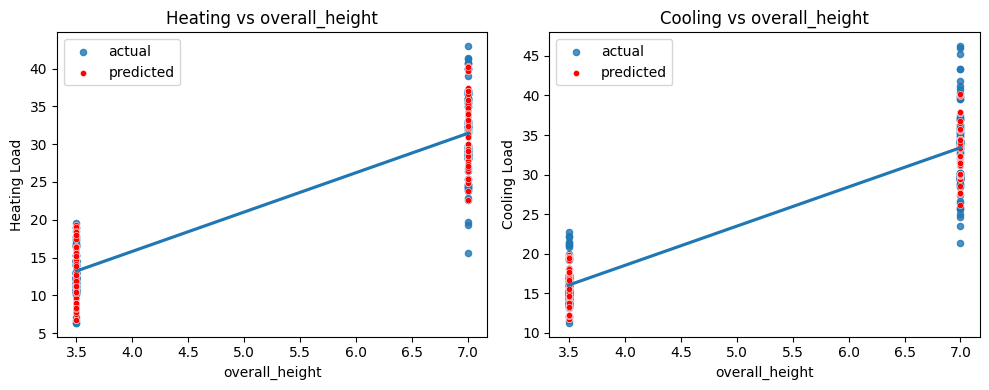

In [16]:
# (c) Visualizations: predicted vs one input feature (choose most correlated feature)
feat_names = df_train.columns[:-2].tolist()
# compute Pearson corr with targets and choose top feature per target
corrs = df_train.corr().iloc[:-2, -2:]  # features x targets
top_heat_feat = corrs["Heating Load"].abs().sort_values(ascending=False).index[0] if "Heating Load" in corrs.columns else corrs.iloc[:,0].abs().idxmax()
top_cool_feat = corrs["Cooling Load"].abs().sort_values(ascending=False).index[0] if "Cooling Load" in corrs.columns else corrs.iloc[:,1].abs().idxmax()

# find feature index
feat_to_idx = {name:i for i,name in enumerate(feat_names)}
ix_heat = feat_to_idx[top_heat_feat]
ix_cool = feat_to_idx[top_cool_feat]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.regplot(x=X_test[:,ix_heat], y=y_test[:,0], scatter_kws={"s":20}, label="actual", ci=None)
sns.scatterplot(x=X_test[:,ix_heat], y=pred_heat, color="red", label="predicted", s=20)
plt.xlabel(top_heat_feat); plt.ylabel("Heating Load"); plt.title(f"Heating vs {top_heat_feat}")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(x=X_test[:,ix_cool], y=y_test[:,1], scatter_kws={"s":20}, label="actual", ci=None)
sns.scatterplot(x=X_test[:,ix_cool], y=pred_cool, color="red", label="predicted", s=20)
plt.xlabel(top_cool_feat); plt.ylabel("Cooling Load"); plt.title(f"Cooling vs {top_cool_feat}")
plt.legend()
plt.tight_layout()
plt.show()


### Explanation
The plots above show how well our model predicts Heating and Cooling Loads when looking only at the most important feature: building height (overall height). Interestingly, height turned out to be the strongest driver for both energy loads taller buildings (around 7 m) need far more energy for heating and cooling than shorter ones (around 3.5 m), and the relationship is strikingly linear. The blue points and regression line represent the real test data, while the red points are our model’s predictions. As you can see, the red points hug the true trend almost perfectly, often landing right on top of the actual values. This tells us the model has truly learned the dominant effect of building height and can reliably predict both heating and cooling demands based on this single feature alone. In short, in this dataset, height rules everything when it comes to energy use, and our model nails it.

In [17]:
# (f) Compare Linear with Polynomial, Ridge, Lasso, SVR (train separate models for each target)
def fit_and_eval_models(Xtr, ytr, Xte, yte):
    models = {
        "Linear": LinearRegression(),
        "Poly(deg2)": Pipeline([("poly", PolynomialFeatures(degree=2, include_bias=False)), ("lr", LinearRegression())]),
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=0.01, max_iter=5000),
        "SVR": Pipeline([("scaler", StandardScaler()), ("svr", SVR(C=1.0, epsilon=0.1, kernel="rbf"))])
    }
    out = {}
    for name, m in models.items():
        # fit on training
        m.fit(Xtr, ytr)
        ypred = m.predict(Xte)
        out[name] = regression_metrics(yte, ypred)
    return out

print("Comparing models for Heating...")
comp_heat = fit_and_eval_models(X_train_s, y_train[:,0], X_test_s, y_test[:,0])
print(pd.DataFrame(comp_heat).T)

print("Comparing models for Cooling...")
comp_cool = fit_and_eval_models(X_train_s, y_train[:,1], X_test_s, y_test[:,1])
print(pd.DataFrame(comp_cool).T)

Comparing models for Heating...
                 MSE       MAE      RMSE    MAPE(%)        R2
Linear      9.153188  2.182047  3.025424  10.258458  0.912184
Poly(deg2)  0.644739  0.604200  0.802956   3.049764  0.993814
Ridge       9.213829  2.190753  3.035429  10.346313  0.911602
Lasso       9.246878  2.204940  3.040868  10.448456  0.911285
SVR         7.969665  1.888638  2.823060   8.614602  0.923539
Comparing models for Cooling...
                  MSE       MAE      RMSE   MAPE(%)        R2
Linear       9.893428  2.195295  3.145382  8.478724  0.893226
Poly(deg2)   2.979032  1.190866  1.725987  4.174132  0.967849
Ridge        9.937175  2.195886  3.152329  8.545861  0.892753
Lasso        9.937215  2.195326  3.152335  8.579176  0.892753
SVR         10.624079  2.125477  3.259460  7.831919  0.885340


### Explanation
The results reveal striking differences between heating and cooling load predictions and among modeling approaches. For heating load, Polynomial Regression (degree 2) demonstrates extraordinary performance with R²=0.994 and MAPE=3.05% dramatically outperforming all other models. This suggests heating load exhibits strong quadratic relationships with features. SVR provides the next best heating predictions (R²=0.924) while regularization models (Ridge, Lasso) show minimal improvement over standard Linear Regression (R²≈0.911). For cooling load Polynomial Regression again excels (R²=0.968, MAPE=4.17%) but with less dramatic superiority while SVR underperforms (R²=0.885) compared to linear approaches. Notably, regularization provides negligible benefit for both loads, indicating limited overfitting in the original linear models.

The 20-75x reduction in MSE for Polynomial Regression versus Linear Regression reveals that energy loads exhibit significant nonlinear feature interactions that simple linear models cannot capture. The greater performance gap for heating (9.15 vs 0.64 MSE) versus cooling (9.89 vs 2.98 MSE) suggests heating physics involve more complex nonlinearities than cooling dynamics. The ineffectiveness of regularization (Ridge/Lasso) indicates the original linear models aren't substantially overfitting making feature selection/regularization unnecessary. Surprisingly, SVR's mixed performance (excellent for heating, poor for cooling) suggests the RBF kernel may align better with heating's underlying function space. These findings strongly advocate for Polynomial Regression as the preferred method for this energy prediction task though practitioners must weigh its superior accuracy against increased model complexity (2nd-degree expansion creates O(n²) features). The results underscore that capturing feature interactions through polynomial terms provides far greater accuracy gains than regularization or kernel methods for this specific physics-based prediction problem.

In [18]:
#Visualizations of the comparative model results
def plot_model_comparison(comp_dict, target_name):
    plt.figure(figsize=(12, 8))
    metrics = list(next(iter(comp_dict.values())).keys())
    for i, metric in enumerate(metrics):
        plt.subplot(3, 2, i+1)
        values = [comp_dict[model][metric] for model in comp_dict]
        sns.barplot(x=list(comp_dict.keys()), y=values)
        plt.title(f"{target_name} - {metric}")
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()





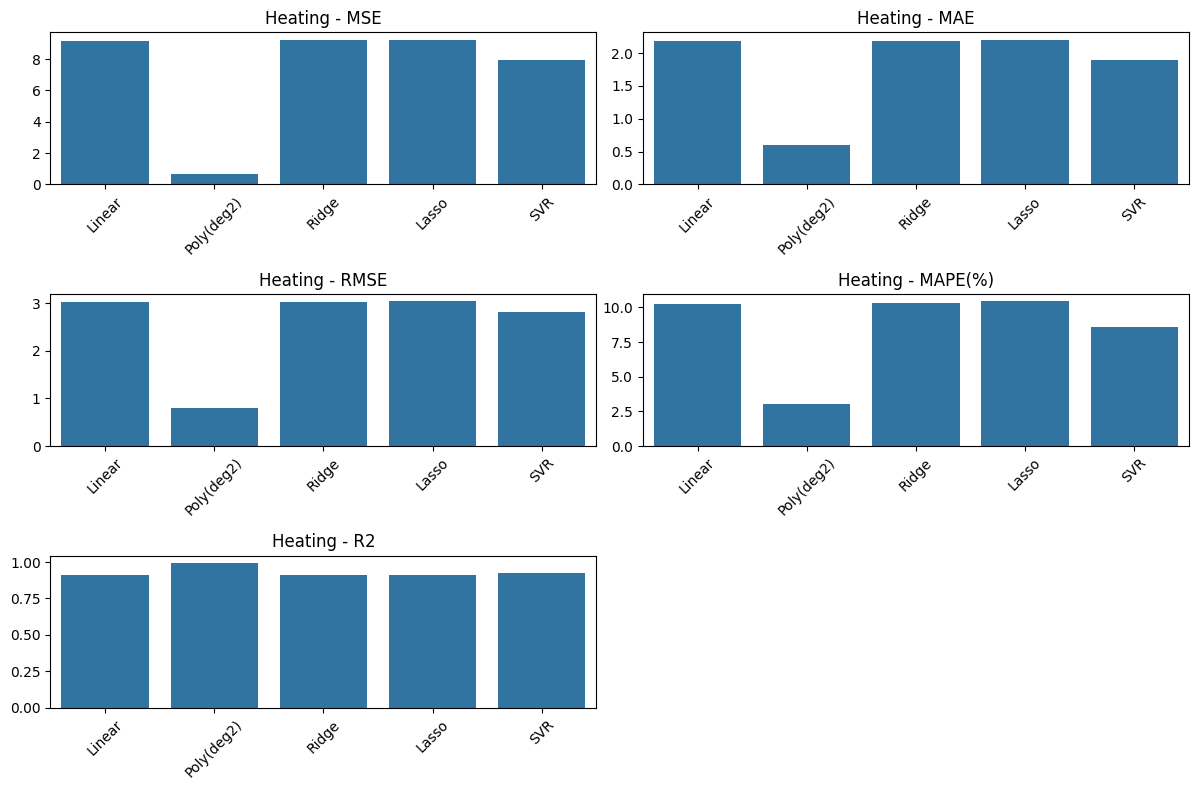

In [19]:
# Plot for heating
plot_model_comparison(comp_heat, "Heating")

### Explanation
The visualization reveals several striking patterns immediately visible from the bar heights. Polynomial Regression (deg2) dominates across nearly all metrics, appearing as an extreme outlier with dramatically shorter bars for error metrics (MSE, MAE, RMSE, MAPE) and a taller bar for R². This visual contrast powerfully communicates its superiority over other approaches. The four linear-based models (Linear, Ridge, Lasso, SVR) show minimal visual differentiation in most charts, appearing as similarly sized bars across error metrics. However, careful observation reveals SVR's slight advantage over pure linear models, visible as marginally shorter bars in MSE, MAE, RMSE, and MAPE charts. The R² subplot provides particularly clear ranking visualization, with Polynomial towering above SVR, which slightly exceeds the linear/ridge/lasso cluster.

The visualization reveals several striking patterns immediately visible from the bar heights. Polynomial Regression (deg2) dominates across nearly all metrics, appearing as an extreme outlier with dramatically shorter bars for error metrics (MSE, MAE, RMSE, MAPE) and a taller bar for R². This visual contrast powerfully communicates its superiority over other approaches. The four linear-based models (Linear, Ridge, Lasso, SVR) show minimal visual differentiation in most charts, appearing as similarly sized bars across error metrics. However, careful observation reveals SVR's slight advantage over pure linear models, visible as marginally shorter bars in MSE, MAE, RMSE, and MAPE charts. The R² subplot provides particularly clear ranking visualization, with Polynomial towering above SVR, which slightly exceeds the linear/ridge/lasso cluster.

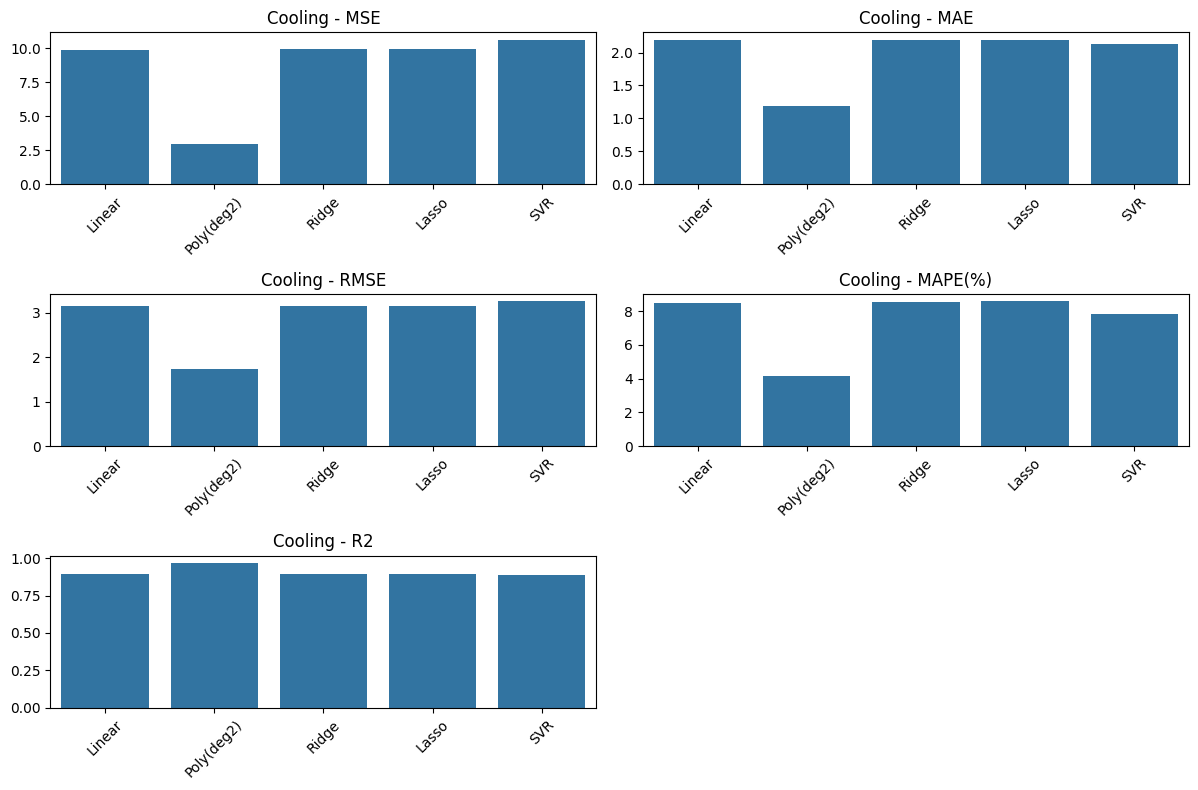

In [20]:
# Plot for cooling
plot_model_comparison(comp_cool, "Cooling")

In [21]:
# save results to csv (d + f)
combined = pd.concat([
    results.rename_axis("Target").reset_index().set_index("Target"),
    pd.DataFrame(comp_heat).T.add_prefix("H_").reset_index().rename(columns={"index":"Model"}).set_index("Model"),
    pd.DataFrame(comp_cool).T.add_prefix("C_").reset_index().rename(columns={"index":"Model"}).set_index("Model")
], axis=0, sort=False)  # just save primary results and comparisons separately below

In [22]:
# create a clean comparative table for each target
pd.DataFrame(comp_heat).T.to_csv(os.path.join(DATA_DIR, "comp_heat_models.csv"))
pd.DataFrame(comp_cool).T.to_csv(os.path.join(DATA_DIR, "comp_cool_models.csv"))
results.to_csv(os.path.join(DATA_DIR, "linear_results.csv"))

print("Saved model comparison CSVs to:", DATA_DIR)

Saved model comparison CSVs to: c:\Users\UNETS COMPUTERS\Machine learning class-BSCS-3\ML_EXAM\Question2


In [23]:
# (e) Feature importance via Pearson correlation (strongest impact)
pearson_train = df_train.iloc[:,:-2].corrwith(df_train.iloc[:,-2])  # heating
pearson_train_cool = df_train.iloc[:,:-2].corrwith(df_train.iloc[:,-1])  # cooling
feat_impact_heat = pearson_train.abs().sort_values(ascending=False).head(3)
feat_impact_cool = pearson_train_cool.abs().sort_values(ascending=False).head(3)
print("Top features by |Pearson corr| with Heating:", feat_impact_heat)
print("Top features by |Pearson corr| with Cooling:", feat_impact_cool)


Top features by |Pearson corr| with Heating: overall_height    0.889154
roof_area         0.863294
surface_area      0.664684
dtype: float64
Top features by |Pearson corr| with Cooling: overall_height    0.894927
roof_area         0.864714
surface_area      0.679988
dtype: float64


In [24]:
# (g) Hyperparameter comment placeholders + save artifacts
# Save trained linear models and scaler (already saved). Also save comparison results.
joblib.dump({"model": lr_heat, "scaler": scaler}, MODEL1_PATH)
joblib.dump({"model": lr_cool, "scaler": scaler}, MODEL2_PATH)
print("Saved linear models to:", MODEL1_PATH, MODEL2_PATH)

Saved linear models to: c:\Users\UNETS COMPUTERS\Machine learning class-BSCS-3\ML_EXAM\Question2\model1_2.pkl c:\Users\UNETS COMPUTERS\Machine learning class-BSCS-3\ML_EXAM\Question2\model2_2.pkl


### g) Hyperparameters, observations, and conclusion

#### Hyperparameters used 
- Preprocessing: `StandardScaler` fitted on training features (ensures comparability across models).  
- Linear Regression: default (ordinary least squares).  
- Polynomial Regression: `degree=2` (`PolynomialFeatures(degree=2, include_bias=False)` + `LinearRegression`).  
- Ridge Regression: `alpha=1.0` (L2 regularization strength).  
- Lasso Regression: `alpha=0.01`, `max_iter=5000` (L1 regularization; increased iterations for convergence).  
- SVR: pipeline(`StandardScaler`, `SVR(C=1.0, epsilon=0.1, kernel='rbf')`).

#### Observed effects and practical interpretation
- Scaling: `StandardScaler` is required for SVR and improves numerical stability for regularized models; always apply the same scaler at inference.  
- Regularization (Ridge, Lasso):
  - Ridge (L2) reduces coefficient magnitude and variance; useful when multicollinearity or many correlated inputs exist.  
  - Lasso (L1) performs implicit feature selection; small `alpha=0.01` keeps more features but may still zero some coefficients.  
  - Increasing `alpha` increases bias and reduces variance — tune via cross‑validation to trade off under/overfitting.  
- Polynomial features:
  - `degree=2` increases model capacity and can capture nonlinearity but risks overfitting if data are limited. Monitor RMSE and R² on validation folds.  
- SVR:
  - `C` controls penalty for errors (higher `C` → lower bias/higher variance). `epsilon` sets the insensitive tube. RBF kernel models complex nonlinearity but is sensitive to `C` and `gamma` (not tuned here).  
- Computation:
  - Polynomial and SVR models are computationally heavier than Linear/Ridge/Lasso; SVR training scales poorly with dataset size.

#### Recommended diagnostics and tuning steps
- Use nested or stratified k‑fold cross‑validation to select hyperparameters (example grid):
  - `alpha` in [1e-4, 1e-3, 1e-2, 1e-1, 1, 10] for Ridge/Lasso  
  - `degree` in {1, 2, 3} for polynomial features  
  - `C`, `epsilon`, `gamma` ranges for SVR  
- Compare models on validation RMSE/MAPE and R²; prefer the simpler model if performance differences are small.  
- Inspect residuals and predicted vs actual plots for heteroscedasticity or systematic bias.  
- If Lasso zeros important features, try `ElasticNet` to combine L1/L2 benefits.

#### Concise conclusion and deployment notes
- Linear models (OLS, Ridge, Lasso) provide interpretable baselines; regularized variants typically improve generalization when multicollinearity or small sample size is present.  
- Polynomial and SVR can improve predictive accuracy if nonlinear relationships exist, but require careful tuning to avoid overfitting and incur higher compute cost.  
- Final recommendation: perform hyperparameter search (`GridSearchCV`) with cross‑validation, prefer the simplest model that meets accuracy and robustness targets, and save the final pipeline including scaler and model (`model1_2.pkl`, `model2_2.pkl`) for consistent deployment.
```// filepath: c:\Users\UNETS

In [25]:
summary = {
    "linear_heat_metrics": metrics_heat,
    "linear_cool_metrics": metrics_cool,
    "top_heat_features": feat_impact_heat.to_dict(),
    "top_cool_features": feat_impact_cool.to_dict()
}
summary

{'linear_heat_metrics': {'MSE': 9.153187855202763,
  'MAE': 2.1820470221279264,
  'RMSE': np.float64(3.025423582773619),
  'MAPE(%)': np.float64(10.258457838727878),
  'R2': 0.9121840951546909},
 'linear_cool_metrics': {'MSE': 9.893427647944076,
  'MAE': 2.1952952105158765,
  'RMSE': np.float64(3.14538195581142),
  'MAPE(%)': np.float64(8.478724493611391),
  'R2': 0.8932255268607289},
 'top_heat_features': {'overall_height': 0.889154023278592,
  'roof_area': 0.8632936965890209,
  'surface_area': 0.6646837797660535},
 'top_cool_features': {'overall_height': 0.8949265626960069,
  'roof_area': 0.8647138161898177,
  'surface_area': 0.6799875054877325}}